In [1]:
import requests
import json
from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt

In [2]:
BOULDER_COORDINATES = "40.0338,-105.2561"
API_URL = "https://api.weather.gov/points/"
BOULDER_URL = API_URL + BOULDER_COORDINATES

In [3]:
%matplotlib inline

In [5]:
overview_page = json.loads(requests.get(BOULDER_URL).text)
hourly_target_url = json.dumps(overview_page['properties']['forecastHourly'], indent=4)[1:-1]
forecast_page = json.loads(requests.get(hourly_target_url).text)
print(hourly_target_url)
hourly_forecast = forecast_page['properties']['periods']

https://api.weather.gov/gridpoints/BOU/54,75/forecast/hourly


In [6]:
tomorrow = datetime.today() + timedelta(days=1)

In [7]:
temps = []
winds = []
for h in hourly_forecast:
    hour_dt = datetime.strptime(h['startTime'][:-9], '%Y-%m-%dT%H:%M')
    if hour_dt.date() == tomorrow.date():
#         print(hour_dt)
#         print(f"Temperature: {h['temperature']}")
#         print(f"Wind Speed: {h['windSpeed'].split()[0]}")
        temps.append(int(h['temperature']))
        winds.append(int(h['windSpeed'].split()[0]))

In [8]:
print(temps)
print(winds)
print('\n')
print(f"Min/Max temp: {min(temps)}/{max(temps)}")
print(f"Max wind: {max(winds)}")

[52, 51, 50, 48, 46, 43, 43, 45, 49, 53, 55, 57, 56, 55, 53, 51, 49, 48, 46, 45, 46, 45, 44, 43]
[7, 7, 8, 8, 8, 8, 8, 7, 6, 6, 6, 7, 7, 6, 7, 9, 10, 10, 10, 9, 7, 7, 6, 6]


Min/Max temp: 43/57
Max wind: 10


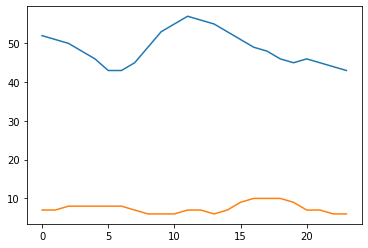

In [9]:
plt.plot(temps)
plt.plot(winds)
plt.show()